## Corner Detection with Python and Pillow (PIL)

In [19]:
import numpy as np
from PIL import Image, ImageOps, ImageDraw
import requests
import cv2
from io import BytesIO
import matplotlib.pyplot as plt

### Preprocessing Functions

In [20]:

def fetch_image_from_url(url):
    """
    Fetches an image from the given URL.

    Args:
        url (str): URL of the image to fetch.

    Returns:
        Image: An Image object if successful, None otherwise.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        return Image.open(BytesIO(response.content))
    except requests.RequestException as e:
        print(f"Error fetching image from URL: {e}")
        return None

def display_image(image, title="Image"):
    """
    Displays an image using matplotlib.

    Args:
        image (Image): The Image object to display.
        title (str): Title of the displayed image. Default is "Image".
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def convert_to_grayscale(image):
    """
    Converts an image to grayscale.

    Args:
        image (Image): The Image object to convert.

    Returns:
        Image: The converted grayscale Image object.
    """
    return ImageOps.grayscale(image)

def detect_corners(image):
    """
    Detects corners in a grayscale image using Harris corner detection algorithm.

    Args:
        image (Image): The grayscale Image object to process.

    Returns:
        Image: The Image object with detected corners marked.
    """
    image_np = np.array(image, dtype=np.float32)
    corners = cv2.cornerHarris(image_np, 2, 3, 0.04)
    corners = (corners > 0.01 * corners.max()).astype(np.uint8)

    draw = ImageDraw.Draw(image)
    for y, row in enumerate(corners):
        for x, val in enumerate(row):
            if val:
                draw.ellipse((x-2, y-2, x+2, y+2), outline='red')
    return image


### Main

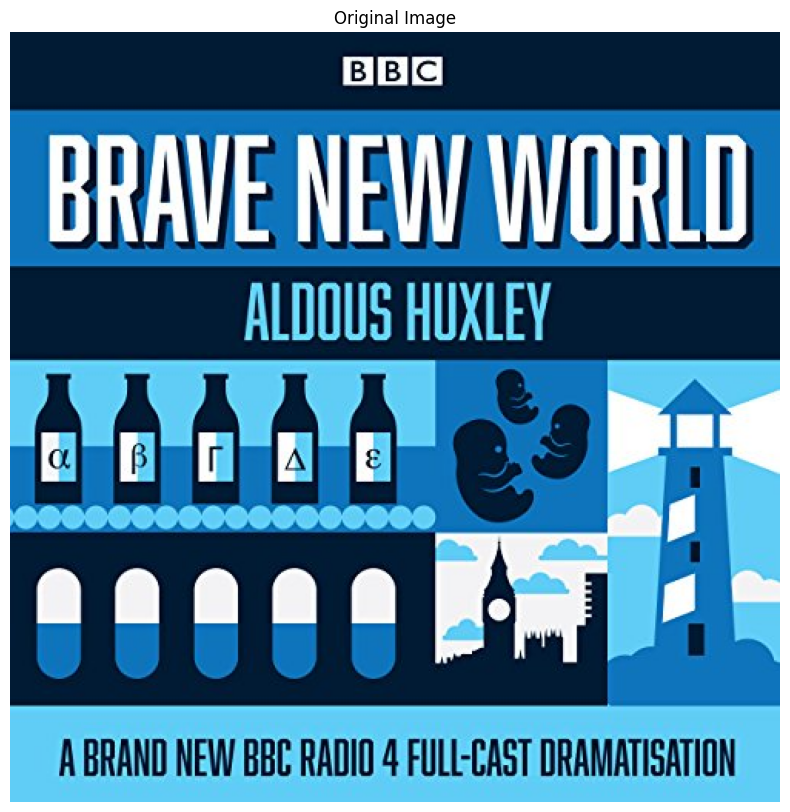

In [21]:

  # URL of the image to process
  img_url = "https://m.media-amazon.com/images/I/51lCHTNkG7L._SL500_.jpg"


  """
  Fetch an image, convert it to grayscale, detect corners,
  and display the original and processed images.
  """
  image = fetch_image_from_url(img_url)
  if image is None:
      print("No image found\n")

  display_image(image, "Original Image")



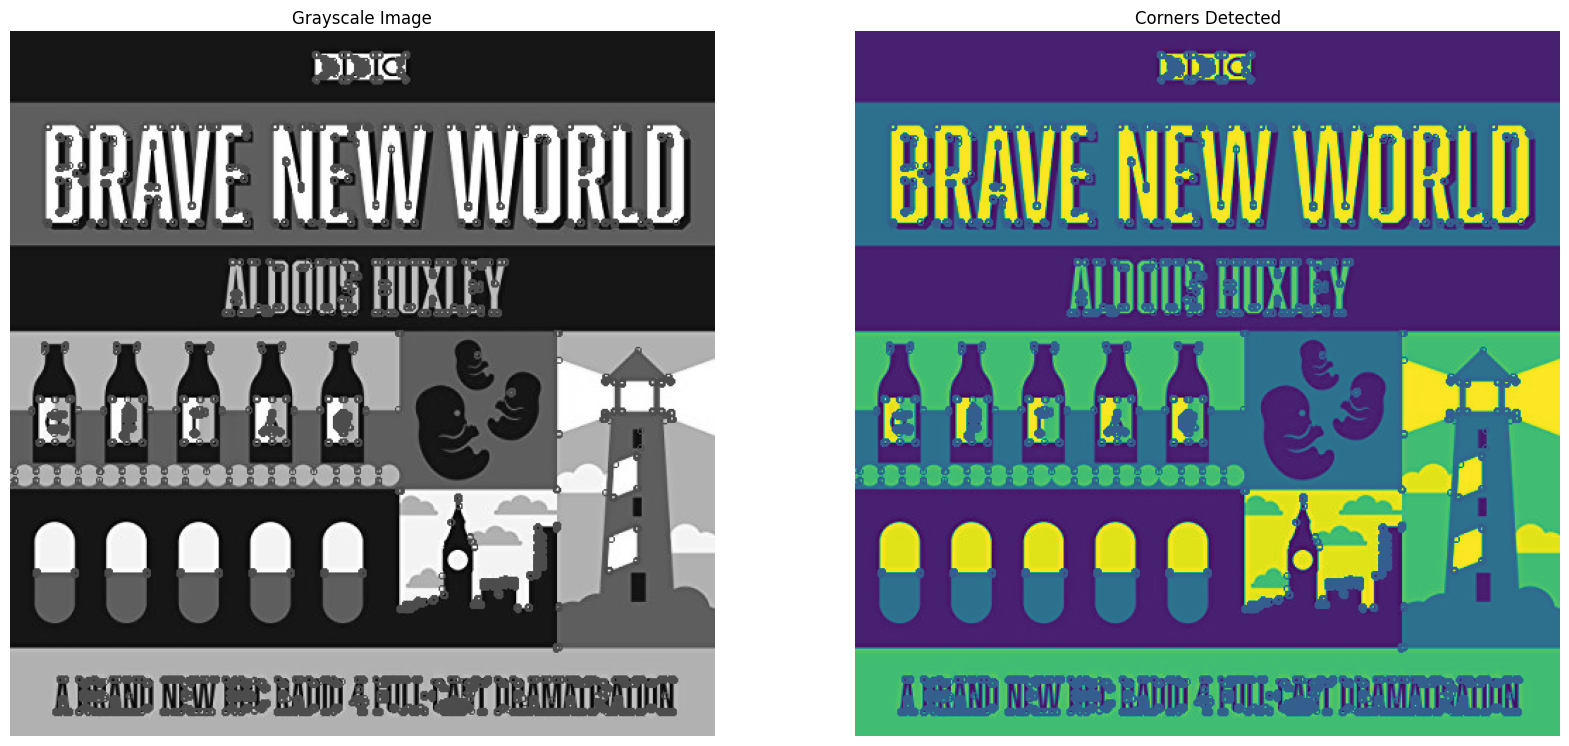

In [22]:
  gray_image = convert_to_grayscale(image)
  corners_image = detect_corners(gray_image)

  # Display the grayscale and corners images
  plt.figure(figsize=(20, 10))

  plt.subplot(1, 2, 1)
  plt.imshow(gray_image, cmap='gray')
  plt.title("Grayscale Image")
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(corners_image)
  plt.title("Corners Detected")
  plt.axis('off')

  plt.show()


## References
- https://en.wikipedia.org/wiki/Feature_(computer_vision)#Detectors
